In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [2]:
dados = pd.read_csv('dataset_IA.csv', encoding='utf-8', sep = ';')

In [3]:
# A variável x é o texto (notícia) e a variável y é a classificaçãoId
X = dados['texto'] # Informações
Y = dados['classificacaoId'] # Rótulos
tipo_de_noticia = dados['nome_area'].unique()
# Convertendo todos os textos para minúsculo
X = X.str.lower()

In [4]:
# Dividindo os dados em treino e teste. 70% para treino e 30% para teste
"""Parâmetros: X são os dados que eu vou fornecer, Y é a classificação desses dados, test_size é o 
tamanho do teste (60%) da amostra, random_state é a aleatoriedade na divisão dos dados, shuffle é para
embaralhar os dados, caso contrário ele vai pegar os 60% iniciais para treino e os 40% finais para teste"""
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

# Vetorizando os dados de treino e de teste (transformando os textos em vetores numéricos)
"""TF-IDF é uma técnica de processamento de linguagem natural (NLP) usada para representar a importância de uma 
palavra em um documento. Ela considera a frequência com que uma palavra aparece em um documento (Term Frequency) 
e a raridade da palavra em relação a todos os documentos da coleção (Inverse Document Frequency)."""
txt_para_vetor = TfidfVectorizer()
X_treino_vetor = txt_para_vetor.fit_transform(X_treino)
X_teste_vetor = txt_para_vetor.transform(X_teste)
"""O fit_transform() é usado para aprender o vocabulário do conjunto de dados de treinamento e também para
transformar os dados de treinamento em vetores de características. O transform() é usado para transformar os
dados de teste em vetores característicos com base no vocabulário aprendido."""

'O fit_transform() é usado para aprender o vocabulário do conjunto de dados de treinamento e também para\ntransformar os dados de treinamento em vetores de características. O transform() é usado para transformar os\ndados de teste em vetores característicos com base no vocabulário aprendido.'

In [5]:
# Treinando o modelo
"""O modelo utiliza um gradiente descendente estocástico (SGD) para classificação | loss é a função de perda,
que é uma função apropriada para separar classes binárias, mas que no caso de 3 classes, também foi efetiva |
 alpha é a constante que multiplica o termo de regularização e que controla a força dela (penalidade) |
 tol é o critério de parada, portanto, não há critério de parada."""
modelo = SGDClassifier(loss = 'hinge', alpha = 1e-3, random_state = 42, max_iter = 5, tol = None)
modelo.fit(X_treino_vetor, Y_treino)

# Fazendo as previsões dos tipos de notícia do conjunto de teste
previsao = modelo.predict(X_teste_vetor)

#Y_teste.values são os valores reais do conjunto de testes(csv), previsao são os valores previstos pelo modelo
print(metrics.classification_report(Y_teste.values, previsao, target_names = tipo_de_noticia))
print(tipo_de_noticia, modelo.classes_)

              precision    recall  f1-score   support

    economia       0.97      0.99      0.98       115
    esportes       0.97      0.97      0.97        59
      cinema       0.96      0.94      0.95        87

    accuracy                           0.97       261
   macro avg       0.97      0.97      0.97       261
weighted avg       0.97      0.97      0.97       261

['economia' 'esportes' 'cinema'] [0 1 2]


[[114   0   1]
 [  0  57   2]
 [  3   2  82]]


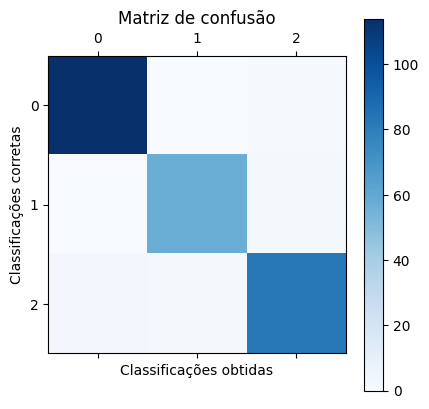

In [6]:
# Plotando a matriz de confusão
matriz_de_confusao = confusion_matrix(Y_teste.values, previsao)
print(matriz_de_confusao)
plt.matshow(matriz_de_confusao, cmap='Blues')
plt.title('Matriz de confusão')
plt.colorbar()
plt.ylabel("Classificações corretas")
plt.xlabel("Classificações obtidas")
plt.show()

Interpretação da matriz: leio pelas linhas, esperava classificação 0, obtive classificação 0, esperava classificação 0, obtive classificação 1, esperava classificação 0, obtive classificação 2.

In [7]:
print(tipo_de_noticia)
pd.crosstab(Y_teste.values, previsao, rownames=['Real'], colnames=['Previsto'], margins=True)

['economia' 'esportes' 'cinema']


Previsto,0,1,2,All
Real,,,,
0,114,0,1,115
1,0,57,2,59
2,3,2,82,87
All,117,59,85,261


Explicação da matriz: As linhas informam quantas notícias foram classificadas como sendo 'economia', 'esportes' ou 'cinema'. Na primeira linha, 12 notícias de economia foram classificadas como economia e 1 notícia de economia foi classificada como cinema.

In [8]:
# Utilizando novas notícias para testar o modelo
lista_noticias = ["Depois de 40 dias de seca de vitórias em seu estádio, o Timão voltou a triunfar dentro de casa. E o resultado positivo diante do Furacão trouxe outras boas notícias.",
                  "Antes do jogo, inclusive, o lateral reserva corria o risco de ser preterido pelo zagueiro Caetano. Foi determinante na jogada do gol.",
                  "Mano Menezes não pôde contar com Fausto Vera e Fábio Santos. Gabriel Moscardo foi o volante mais recuado e Matheus Bidu ganhou chance na lateral-esquerda.",
                  "A trama começa na Alemanha de 1959, quando Priscilla Beaulieu (Cailee Spaeny, da série Mare of Easttown), que vivia numa base militar americana, é convidada para uma festa comandada por Elvis Presley (Jacob Elordi, da série Euphoria).",
                  "A jovem, de 14 anos na época, vive uma história de amor à primeira vista com o ídolo. Anos depois, ela consegue a permissão da família para viver com o cantor em Graceland, sua propriedade em Memphis.",
                  "Este foi o terceiro corte seguido na taxa básica de juros, que começou a recuar em agosto deste ano.",
                  "A decisão de hoje foi unânime. Ou seja, todos os membros do Copom votaram pela redução de 0,5 ponto percentual.",
                  "O Comitê de Política Monetária (Copom) do Banco Central decidiu, nesta quarta-feira (01), reduzir a Selic em 0,5 ponto percentual, de 12,75 por cento ao ano para 12,25 por cento ao ano.",
                  "A Selic chegou agora ao menor nível desde o início de maio de 2022 -- quando estava em 11,75% ao ano.",
                  "Em continuação que estreia nesta quinta-feira (15), cineasta reforça conceito apresentado em blockbuster de 2009. Efeitos visuais incríveis contrastam com história insípida e pouco inspirada."
                  ]

In [9]:
def noticias_classificacao(noticias, vetorizador = txt_para_vetor, modelo = modelo, tipo = tipo_de_noticia):
    noticias_vetorizadas = vetorizador.transform(noticias)
    previsao = modelo.predict(noticias_vetorizadas)
    for texto, tipo_noticia in zip(noticias, previsao):
        parte_do_texto = texto[:60]
        print(f'{parte_do_texto} => {tipo[tipo_noticia]}')

noticias_classificacao(lista_noticias)

Depois de 40 dias de seca de vitórias em seu estádio, o Timã => cinema
Antes do jogo, inclusive, o lateral reserva corria o risco d => esportes
Mano Menezes não pôde contar com Fausto Vera e Fábio Santos. => esportes
A trama começa na Alemanha de 1959, quando Priscilla Beaulie => cinema
A jovem, de 14 anos na época, vive uma história de amor à pr => cinema
Este foi o terceiro corte seguido na taxa básica de juros, q => economia
A decisão de hoje foi unânime. Ou seja, todos os membros do  => economia
O Comitê de Política Monetária (Copom) do Banco Central deci => economia
A Selic chegou agora ao menor nível desde o início de maio d => economia
Em continuação que estreia nesta quinta-feira (15), cineasta => cinema


In [10]:
noticia = ["O Instituto Sigilo, oficialmente denominado Instituto Brasileiro de Defesa da Proteção de Dados Pessoais, Compliance e Segurança da Informação, lançou um novo portal destinado à verificação das informações de beneficiários do extinto programa Auxílio Brasil. Esse portal permite que os beneficiários confirmem se seus dados pessoais foram comprometidos e se têm direito a receber compensação.",
"Em setembro, a 1ª Vara Cível Federal de São Paulo aceitou o pedido do Instituto Sigilo e determinou o pagamento de R$ 15 mil a título de danos morais a cada pessoa afetada",
"Os gols alvinegros foram três ao total. Logo no começo do segundo tempo, o outro time descontou com um golaço. Aos 30 minutos, em lance capital, o zagueiro , do Botafogo, foi expulso.",
"Naquela corrida, Russell largou na pole. Hamilton ficou na cola do companheiro de equipe, chegou a assumir a liderança, mas foi superado pela estabilidade do colega com tempo de 1h38min34s044. Ambos dividiram o pódio brasileiro em 2022 com Carlos Sainz, da Ferrari.",
"Nesta quarta-feira (01), após a vitória de 2 a 1 em cima do Coritiba, pela 31ª rodada do Campeonato Brasileiro, o vice-presidente de futebol Antônio Brum comentou sobre um possível substituto a Suárez."
]
noticias_classificacao(noticia)

O Instituto Sigilo, oficialmente denominado Instituto Brasil => cinema
Em setembro, a 1ª Vara Cível Federal de São Paulo aceitou o  => economia
Os gols alvinegros foram três ao total. Logo no começo do se => esportes
Naquela corrida, Russell largou na pole. Hamilton ficou na c => esportes
Nesta quarta-feira (01), após a vitória de 2 a 1 em cima do  => esportes
